In [178]:
#Loading modules 

# Preprocessing and splitting modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (
train_test_split, KFold, StratifiedShuffleSplit)

# Learnign Algorithms Modules

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd
import numpy as np


In [173]:
# Folder path
path =  "../data/"

# Which values are considered NaN
na_vls = ['#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', 
               '1.#IND', '1.#QNAN', '<NA>', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 
                'null', '...']

# Load datasets
df_products = pd.read_csv(path+"New_ProdutosVarejos.csv", na_values = na_vls)
df_clts = pd.read_csv(path+"New_Coletas.csv", na_values = na_vls)

df_join = df_products.merge(right = df_clts, how='inner',\
                    on = 'MasterKey_RetailerProduct').groupby(\
                        ["Department", "Category", "Customer", "Product","Specifics", "DateIns","Brand", "EAN", "Retailer"]\
                            ).mean()[["FinalPrice"]].reset_index()



C:\Users\luiza\AppData\Local\Temp\ipykernel_9580\3267694591.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ).mean()[["FinalPrice"]].reset_index()


In [174]:
selected_customer = 'Unilever'
selected_brand = 'Dove'

df_join = df_join[(df_join["Customer"]==selected_customer)&
              (df_join["Brand"]==selected_brand)  ]

selected_product = 'Condicionador'

df_join = df_join[(df_join["Product"].str.find(selected_product)!=-1)].groupby("DateIns")["FinalPrice"].mean().reset_index()
df_join

,DateIns,FinalPrice
0,2023-05-01,25.037204
1,2023-05-02,23.683590
2,2023-05-03,27.219812
3,2023-05-04,28.852193
4,2023-05-05,29.544878
...,...,...
56,2023-06-26,27.752290
57,2023-06-27,26.908309
58,2023-06-28,28.499029
59,2023-06-29,25.556258


Mean Squared Error: 1.3077456431793297


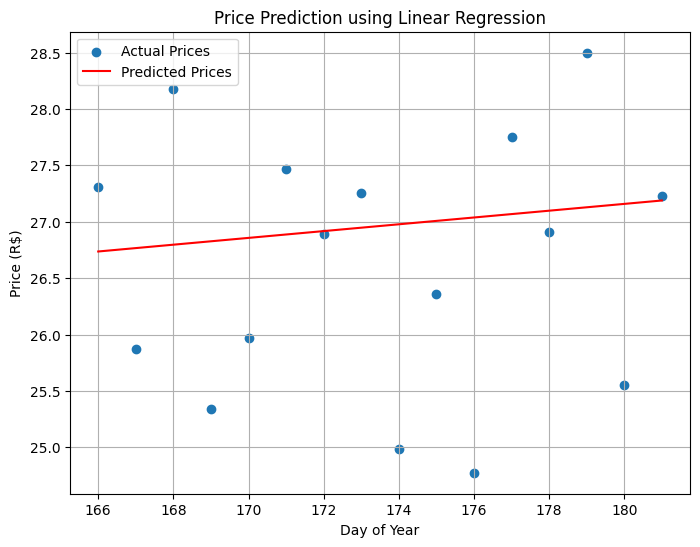

In [177]:
df = pd.DataFrame(df_join)

df['DateIns'] = pd.to_datetime(df['DateIns'])

# Feature engineering: Extract day of the year as a feature
df['DayOfYear'] = df['DateIns'].dt.dayofyear

df = df.reset_index()

# Split data into features (X) and target (y)
X = df[['DayOfYear']]
y = df["FinalPrice"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=False)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Visualize the predictions and actual prices
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Actual Prices')
plt.plot(X_test, y_pred, label='Predicted Prices', color='red')
plt.xlabel('Day of Year')
plt.ylabel('Price (R$)')
plt.title('Price Prediction using Linear Regression')
plt.legend()
plt.grid(True)
plt.show()

